## **Dataset visualization and extraction from ESRF .h5 files**
- Version: 1.3 | Author: William Rigaut | Date: 29.06.2025
- Tested on MacOS Ventura 13.4.1 and Python 3.12.3

This code is designed to extract and visualize data from the European Synchrotron Radiation Facility (ESRF) at beamline BM02.

The module contains:
- Functions for extracting and visualizing data from the raw .h5data files
- Functions for extracting and visualizing data from the processed .h5 files
- Functions for saving data to .xy files

### **1. Import library and setup**

Firstly you can create a set of folders where your data will be stored and extracted. I recommand creating a main folder called `ESRF_data` containing three subfolder :
- `RAW_DATA` : Folder contaning the raw XRD data from the 2D camera
- `PROCESSED_DATA` : Folder containing the 1D spectra from integrated 2D images
- `SAVED_DATA` : Output folder containing .xy 1D spectra for each position

In [67]:
# Defining our paths with pathlib librairy
import pathlib as pl

main_folder = "ESRF_data"

raw_data_path = pl.Path(main_folder + '/' + "RAW_DATA")
processed_data_path = pl.Path(main_folder + '/' + "PROCESSED_DATA")
saved_data_path = pl.Path(main_folder + '/' "SAVED_DATA")

Then you can import the package `extract_esrf` to create these folders for you with :

In [68]:
# Making folders with create_folders() function from extract_esrf library
import packages.extract_esrf.extract_esrf as ee

ee.create_folders(main_folder,
                  raw_data_path, processed_data_path, saved_data_path)

Creating folder ESRF_data
Folder ESRF_data already exists.
Creating folder ESRF_data/RAW_DATA
Folder ESRF_data/RAW_DATA already exists.
Creating folder ESRF_data/PROCESSED_DATA
Folder ESRF_data/PROCESSED_DATA already exists.
Creating folder ESRF_data/SAVED_DATA
Folder ESRF_data/SAVED_DATA already exists.


Now that everything is setup you can download or import your raw data files from ESRF in the `RAW_DATA/` and `PROCESSED_DATA/` directories.

<span style="color: red;">Disclamer: You need to have both raw and processed data in order for the notebook to run properly.</span>

### **2. Data visualization and data extraction**

You can define the variable `foldername` to be the folder that contains the data you want to see, here is an example with NdFeB_7-17 dataset for the scan number 31:

In [81]:
foldername="NdCeFeB_3_15"
scan_number=263

Then you can call the function `extract_CdTe_data()` by specifiying both the foldername and the scan_number in argument. A few details about this function :
- The function actually returns an array containing the count on each pixel of the 2D camera. You can eventually save the content of image_2D if needed.
- You can disable the plotting by setting display to False with the code `ee.extract_CdTe_data(foldername, scan_number, display=False)`.
- If you are using a path for the raw data that is different from the one previously suggested you must pass in argument `raw_data_path=your_custom_path` so that the function knows where to look for the data.
- Note that in the 2D camera datasets, the first 24 scans are corresponding to z and theta alignements along the wafer, the first acquired position starts at `scan_number=25` and the last at `scan_number=273`.

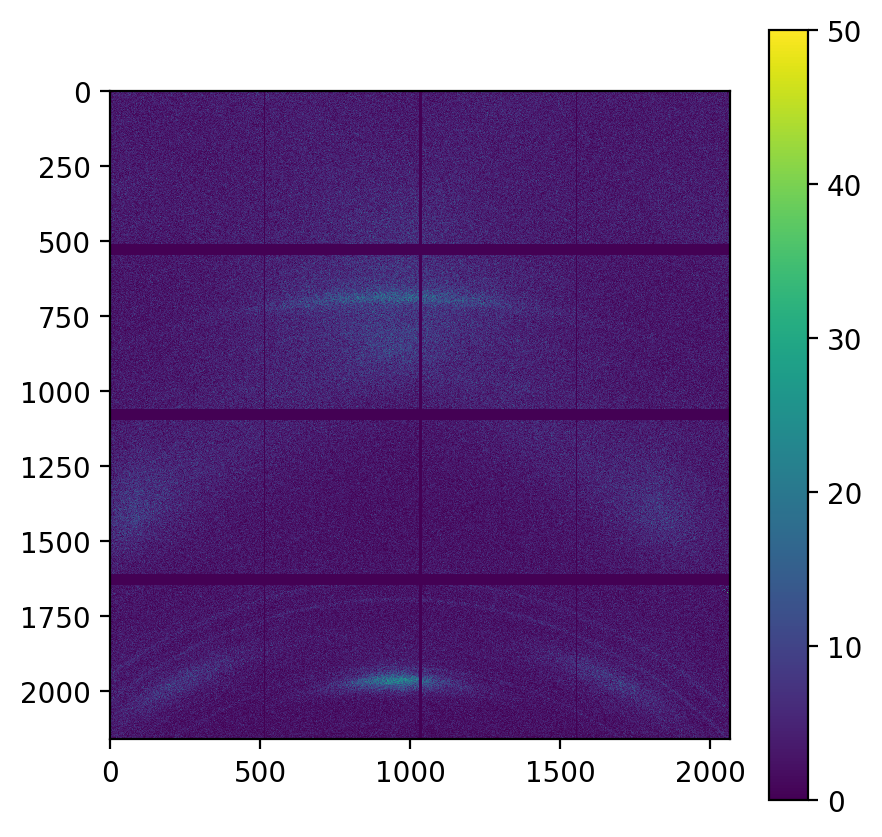

In [82]:
image_2D, metadata = ee.extract_CdTe_data(foldername, scan_number, display=True, output_metadata=True, raw_data_path=raw_data_path)

A very similar `function extract_integrated_data()` can be used to display the 1D integrated image data like this :

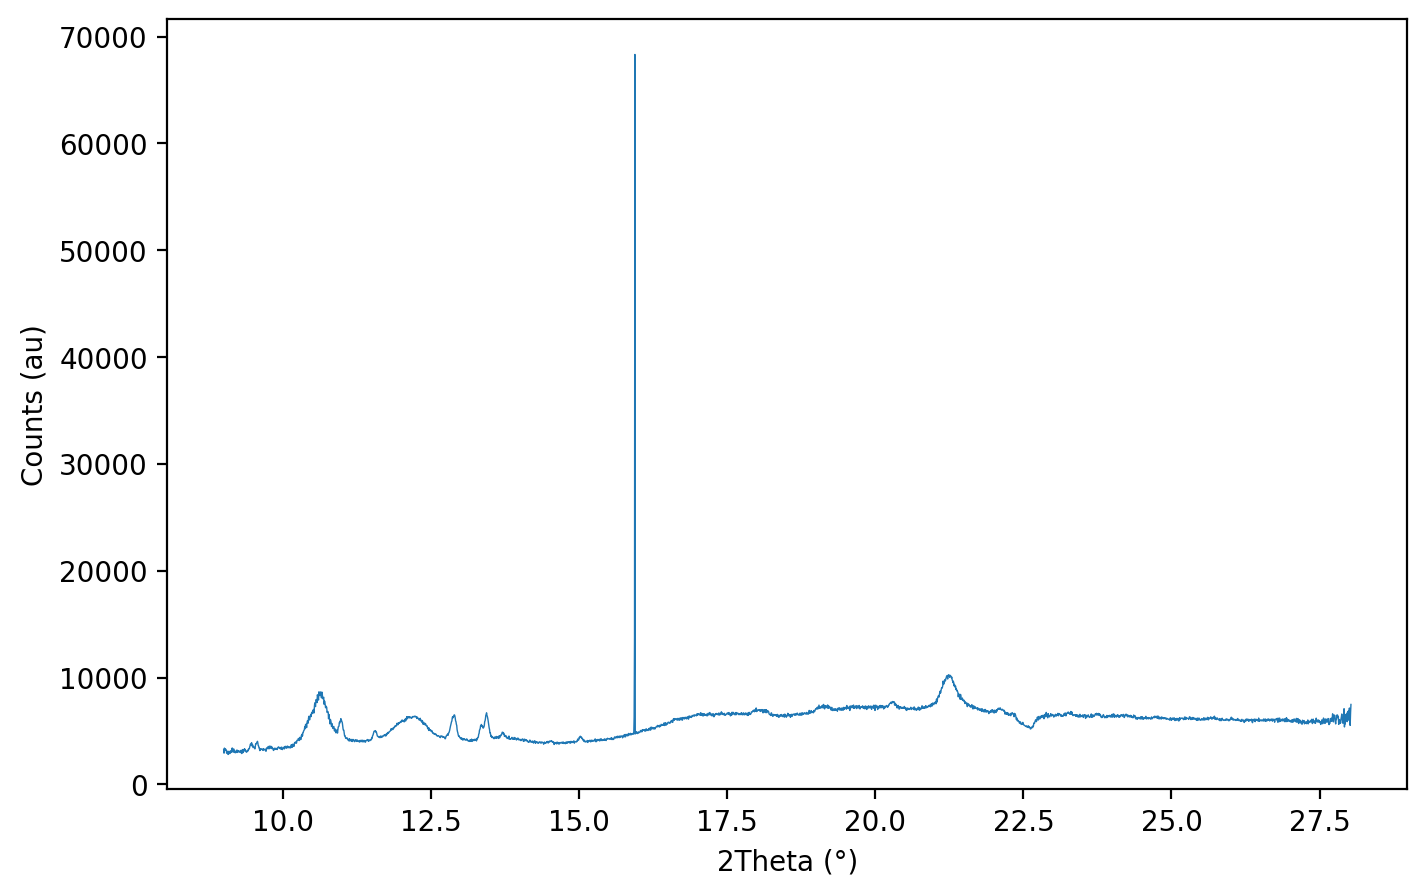

In [83]:
spectra_1D = ee.extract_integrated_data(foldername, scan_number, display=True, processed_data_path=processed_data_path)

You can then simply save the spectra using the function `save_integrated_data()` by passing first both the `foldername` and the `scan_number` as argument to generate a .xy file with a proper filename and then the `spectra_1D` you want to save. A few points :
- The x values saved are q values (in Å^-1) converted to 2θ angle by knowing the beam energy (25 keV).
- In the .h5 integrated data, counts at each angle are calculated by summing all the pixels intensities and normalized by the total number of pixels. In the library, the y values are arbitrary rescaled with a factor of 1000 to make it easier to read in Profex. The final unit for the counts should be counts/pixel*10^3.

In [84]:
ee.save_integrated_data(foldername, scan_number, spectra_1D, saved_data_path=saved_data_path)

If you want to save all the data from the dataset (excluding the calibration points) you can use instead `save_all_integrated()` by specifiying the `foldername` and all three paths `raw_data_path`, `processed_data_path`, `saved_data_path` to the function.

- The function will read all the scans from number 27 to 315 (25 to 274 for new scans), excluding the z and theta scans from calibration
- Metadata is copied from the raw data fils and written in the header of each .xy files.

In [85]:
ee.save_all_integrated(foldername,
    raw_data_path=raw_data_path,
    processed_data_path=processed_data_path,
    saved_data_path=saved_data_path,
    custom_range=range(25, 274),
    scaling=1e10)

100%|██████████| 249/249 [00:47<00:00,  5.25it/s]

All .xy spectrum saved in ESRF_data/SAVED_DATA/NdCeFeB_3_15 succesfully !


The same can be done with the images using the function `save_all_images()` where you need to pass in arguments the `foldername`, the `raw_data_path` and the `savec_data_path`.

- By default the function will only read measurement data which includes scans from number 27 to 315, but a `custom_range` can be specified using the `range(start, stop)` function.
- The image is saved using the FabIO library, and his saved as .img by default. Format can be changed with the `custom_format` parameter. A list of all FabIO compatible formats can be found here: http://www.silx.org/doc/fabio/latest/getting_started.html#list-of-file-formats-that-fabio-can-read-and-write

In [86]:
ee.save_all_images(
    foldername,
    raw_data_path=raw_data_path,
    saved_data_path=saved_data_path,
    custom_range=range(25, 274))

100%|██████████| 249/249 [00:45<00:00,  5.44it/s]

All CdTe data saved in ESRF_data/SAVED_DATA/NdCeFeB_3_15 succesfully !


You can then read the .img files using the `fabio` python module. Here is a advanced example using interactive sliders to display images:

In [16]:
import packages.extract_esrf.extract_esrf as ee

folderpath_str = "/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/SAVED_DATA/SiO2"

ee.display_all_img(folderpath_str, index=117, scale="normal", aspect="1", index_slider_min=35, index_slider_max=285)

interactive(children=(IntSlider(value=117, description='index', max=285, min=35), IntSlider(value=0, descripti…

The follwing function `fuse_all_img()` will merge all of the images in a folder. You can customize the selection with the argument `idx_range`, default value is `range(25, 274)`
- You can use this following code to plot the fused image :

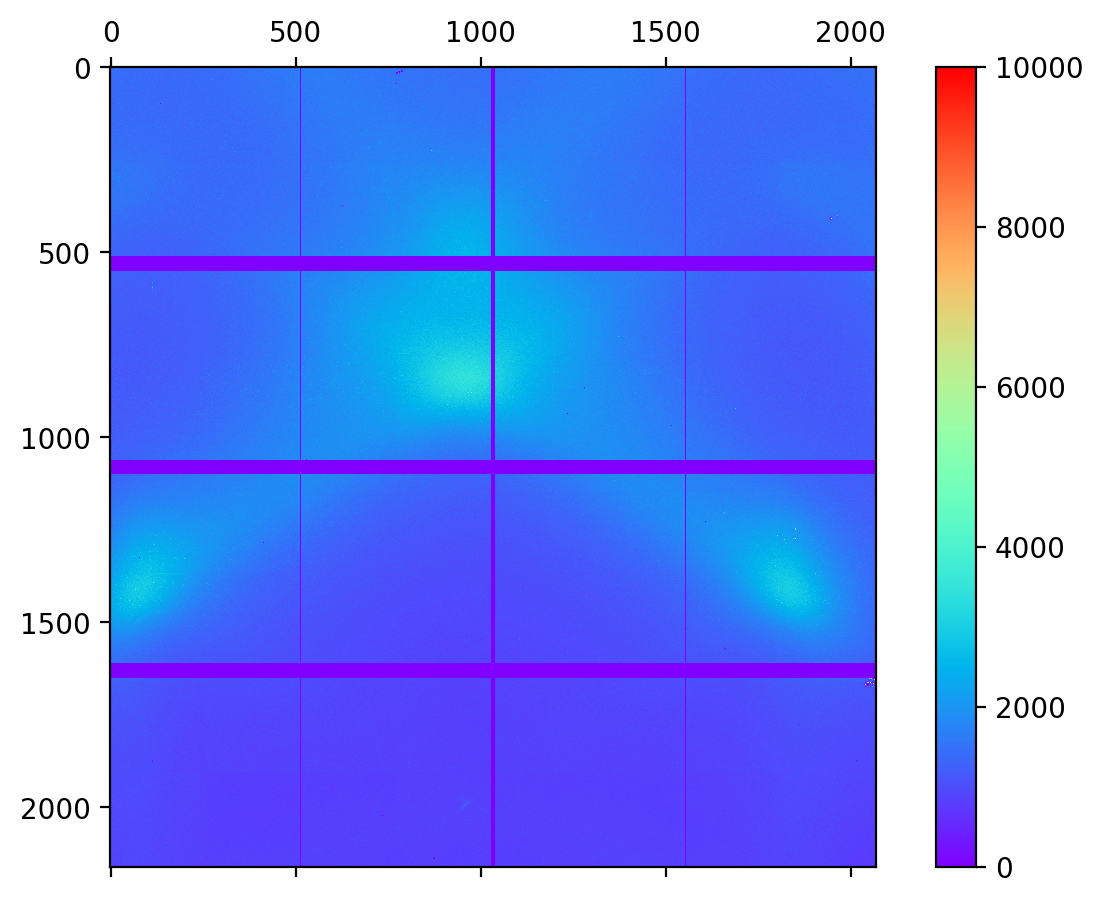

In [19]:
import packages.extract_esrf.extract_esrf as ee

fused_img = ee.fuse_all_img(folderpath_str, idx_range=range(35, 283))
img_data_current = ee.plot_img("ESRF_data/SAVED_DATA/NdXFeB-triode/3161_NdFeB", index=193, plot=False)
img_data_current_2 = ee.plot_img("ESRF_data/SAVED_DATA/NdXFeB-triode/3161_NdFeB", index=200, plot=False)
ee.plot_img('_', '_', img_data=fused_img, vmin=0, vmax=40*250, scale="normal", aspect="1")

Integrate using pyFAI :

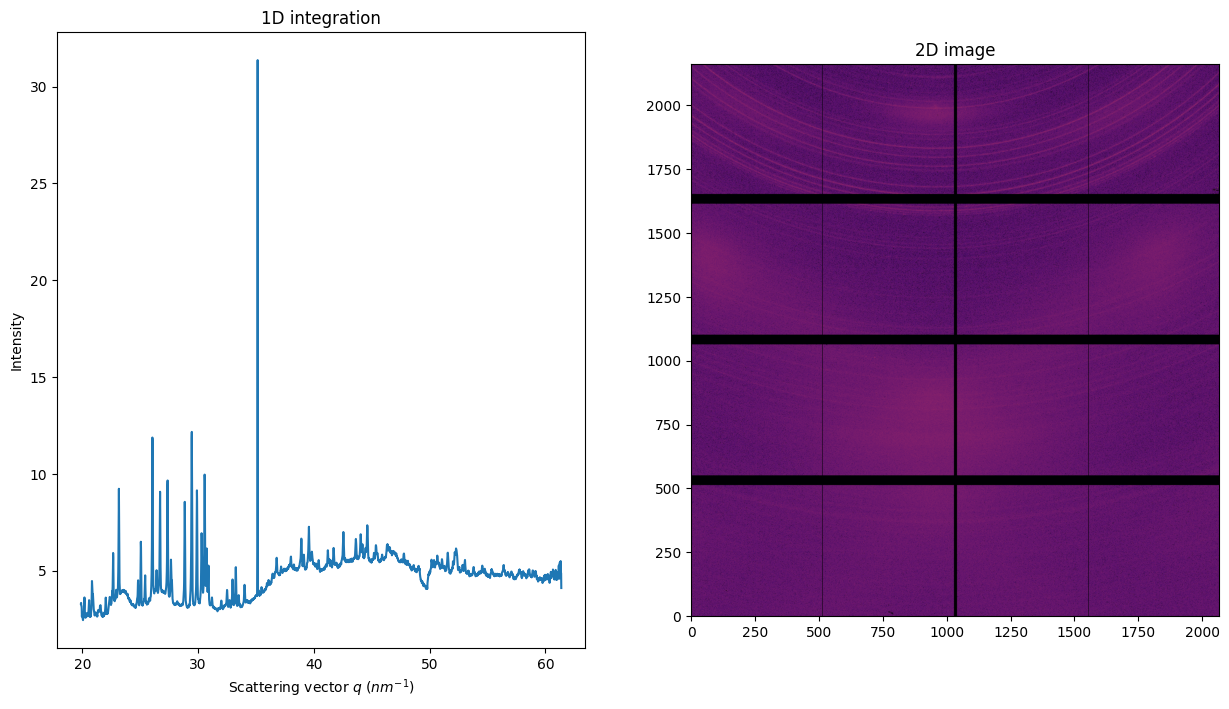

In [124]:
import os
os.environ["PYOPENCL_COMPILER_OUTPUT"]="0"

from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
import numpy, fabio, pyFAI
from pyFAI import benchmark
from pyFAI.test.utilstest import UtilsTest
import packages.extract_esrf.extract_esrf as ee

ai = pyFAI.load("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/CONFIG/LaB6_25keV_20251031.poni")

foldername = "NdCeFeB_3_13"
scan_number = 25
_raw_data, metadata = ee.extract_CdTe_data(foldername, scan_number, display=False, output_metadata=True, raw_data_path="./ESRF_data/RAW_DATA/")
img = fabio.open(f"/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/SAVED_DATA/{foldername}/{foldername}_{scan_number}.img").data

fig, ax = subplots(1, 2)
fig.set_size_inches(15, 8)
jupyter.display(img, ax=ax[1])
plot1d = ai.integrate1d(img, 2999)
jupyter.plot1d(plot1d, ax=ax[0])
ax[1].set_title("2D image")
pass

Text(0.5, 1.0, 'Median filtering')

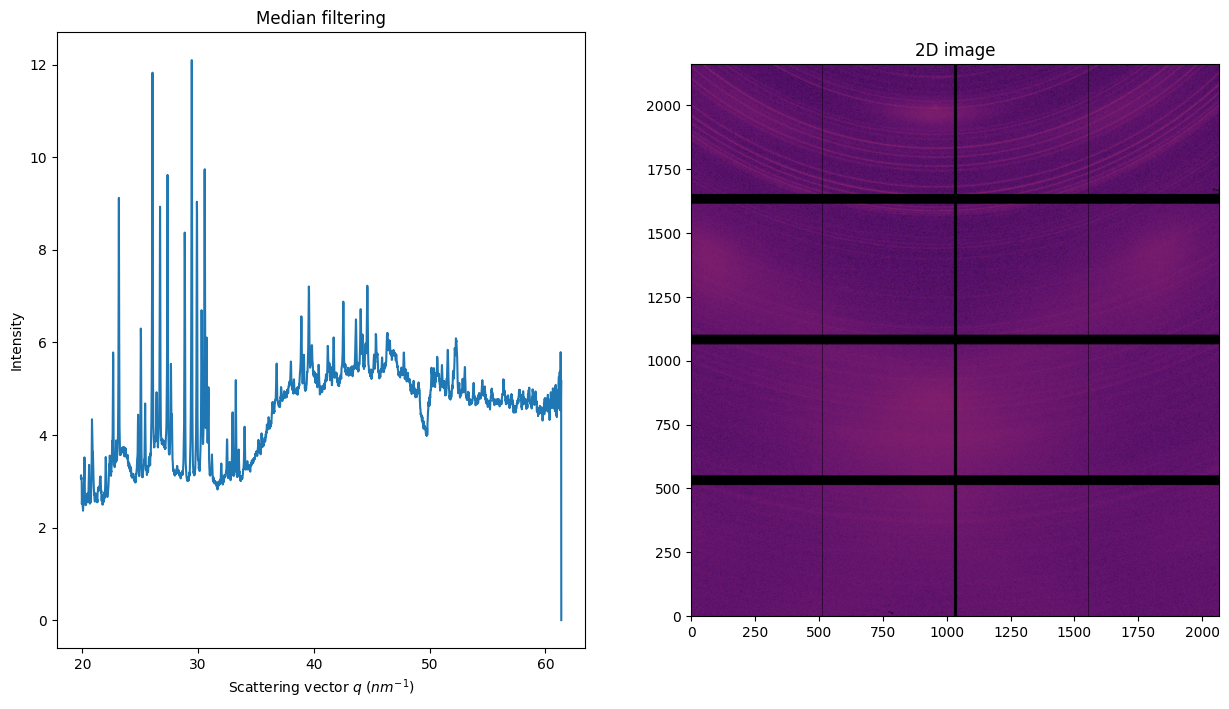

In [126]:
method = ["full", "csr", "cython"]
percentile=(10,90)
pol=0.99
plot1d_corrected_median = ai.medfilt1d_ng(img, 3000, method=method, percentile=percentile, polarization_factor=pol)

fig, ax = subplots(1, 2)
fig.set_size_inches(15, 8)
jupyter.display(img, ax=ax[1])
jupyter.plot1d(plot1d_corrected_median, ax=ax[0])
ax[1].set_title("2D image")
ax[0].set_title("Median filtering")

In [146]:
import os
os.environ["PYOPENCL_COMPILER_OUTPUT"]="0"
from matplotlib.pyplot import subplots
from pyFAI.gui import jupyter
import numpy, fabio, pyFAI
from pyFAI import benchmark
from pyFAI.test.utilstest import UtilsTest
import packages.extract_esrf.extract_esrf as ee
import tqdm

def med_filter_integrate_1d(foldername, scan_number, poni, percentile=(10,90), scaling=1e6):
    _raw_data, metadata = ee.extract_CdTe_data(foldername, scan_number, display=False, output_metadata=True, raw_data_path="./ESRF_data/RAW_DATA/")
    img = fabio.open(f"/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/SAVED_DATA/{foldername}/{foldername}_{scan_number}.img")
    xy_file = f"./ESRF_data/SAVED_DATA/{foldername}/{foldername}_{scan_number}.xy"

    # Defining integration parameters
    method = ["full", "csr", "cython"]
    pol=0.99
    plot1d_corrected_median = ai.medfilt1d_ng(img.data, 3000, method=method, percentile=percentile, polarization_factor=pol)

    q_list = plot1d_corrected_median[0]
    theta_list = ee._convert_from_q_to_theta(q_list/10)
    intensity = plot1d_corrected_median[1]*scaling

    with open(xy_file, "w") as xy:
        for meta in metadata.keys():
            xy.write(f"#{meta}: {metadata[meta]}\n")
        for i, theta in enumerate(theta_list):
            xy.write(f"{theta}\t{intensity[i]}\n")


foldername = "NdCeFeB_3_15"
poni = pyFAI.load("/Users/williamrigaut/Desktop/Notebooks/Extract_ESRF_Data/ESRF_data/CONFIG/LaB6_25keV_20251031.poni")

for scan_number in tqdm.tqdm(range(25, 274)):
    med_filter_integrate_1d(foldername, scan_number, poni)

100%|██████████| 249/249 [05:17<00:00,  1.27s/it]
